<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Homework 1 : Images of the Russian Empire:
Colorizing the Prokudin-Gorskii photo collection </center>
<hr style=" border:none; height:3px;">
</h1>

# Negin HEIDARIFARD _ M2 AI _ Paris-Saclay Univeristy

This lab is inspired by the work of Alexei Alyosha Efros, a renowned researcher in vision and computer graphics, and is offered as part of his course [Intro to Computer Vision and Computational Photography](https://cal-cs180.github.io/fa24/).


# A Bit of History

In 1907, Sergei Mikhailovich Prokudin-Gorskii (1863–1944), convinced that color photography was the way of the future, requested and received permission from the Tsar to travel across the Russian Empire and take color photographs of everything he saw. He truly photographed everything:  
+ people,  
+ buildings,  
+ landscapes,  
+ railways,  
+ bridges...  

The goal was to produce thousands of color photographs. At that time, color photography did not yet exist. His idea was quite simple: **to record three exposures of each scene on glass plates using a red, green, and blue filter for each one**.

<center><img src='./Images/cathedral.jpeg' width=200></center>

At the time, printers did not exist, and there was no way to print these color photographs! He envisioned special projectors being installed in classrooms throughout the empire, where children could learn more about their vast country. Unfortunately, his plans never materialized. He left Russia in 1918, just after the revolution.

The RGB ("Red-Green-Blue") negatives capturing the final years of the Russian Empire survived and were purchased in 1948 by the Library of Congress in the United States. In 2004, the Library digitized these negatives and made them accessible online. This is the [Prokudin-Gorskii collection](https://www.loc.gov/pictures/collection/prok/).

An explanation of how the images were colorized is available [here](https://www.loc.gov/exhibits/empire/making.html).



# Objective of this Lab

The goal of this lab is to automatically generate a color image from the digitized glass plates of the Prokudin-Gorskii collection, with minimal visual artifacts.

To achieve this, you will need to extract the three color channels, stack them on top of each other, and align them so that their combination forms an RGB color image (additive synthesis). A simple translation model (in \(x, y\)) is sufficient to align the images correctly. However, since the glass plates are very large, the alignment procedure must be relatively fast and efficient.


## Some Guidelines

A selection of digitized glass plate images (in both low and high resolution) is available in the `Data` directory (the order of the filters from top to bottom is BGR, not RGB!).  

<center><img src='./Images/3-rgb.jpeg' width=200></center>

The objective is to design a program that takes a glass plate image as input and outputs a color image.  
The program must:  
+ Divide the original image into three images of equal dimensions.  
+ Then align the second and third images (G and R) to the first (B).  
+ For each image, calculate the displacement vector \((x, y)\) necessary to align it with the first image.  


### Step 0: Getting Started with the Images

Write a function to load and display an image from the collection (provided in the [Data](./Data) directory).

In [ ]:
# Import necessary libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for displaying images


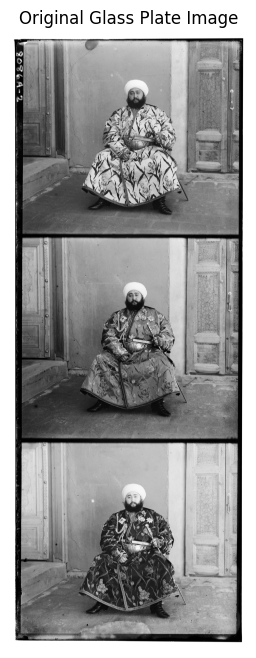

In [ ]:
# Define the image path (Make sure this path is correct for your system)
image_path = r"E:\Master AI\M2\T7\Computer vision\assignment VISON\Data\emir.tiff"

def load_and_display_image(image_path):
    """
    Function to load an image in grayscale and display it.
    This is the original glass plate image before processing.
    """
    # Read the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded correctly
    if img is None:
        print("Error: Unable to load the image. Check the file path!")
        return

    # Display the image using Matplotlib
    plt.figure(figsize=(8, 8))  # Set figure size
    plt.imshow(img, cmap='gray')  # Show image in grayscale
    plt.title("Original Glass Plate Image")  # Title of the plot
    plt.axis("off")  # Remove axis labels for better visualization
    plt.show()

# Call the function to load and display the image
load_and_display_image(image_path)


# Step 0: Getting Started with the Images

### Goal
- Load and display the **original Prokudin-Gorskii glass plate image**.
- The image contains **three vertically stacked grayscale images** captured using **Red, Green, and Blue** filters.

### Theory
- This photograph belongs to **Sergei Mikhailovich Prokudin-Gorskii (1863–1944)**, a Russian photographer known for pioneering early **color photography**.
- In 1907, he captured thousands of images across the **Russian Empire** using a technique that involved taking **three black-and-white exposures** through **Blue, Green, and Red filters**.
- The original image is stored as a **grayscale image** but consists of three different sections:
  - **Top section** → Captured using a **Blue filter**.
  - **Middle section** → Captured using a **Green filter**.
  - **Bottom section** → Captured using a **Red filter**.

- To reconstruct a color image, the process involves:
  1. **Loading the glass plate image** in grayscale.
  2. **Separating the three sections** (which will be done in the next step).
  3. **Aligning and merging them** into a full-color RGB image.

### Code Implementation
- We uploaded the **Prokudin-Gorskii glass plate image** and processed it using the function `load_and_display_image(image_path)`.
- This function performs the following steps:
  1. Reads the image using **OpenCV** in grayscale mode.
  2. Verifies if the image is loaded correctly.
  3. Displays the image using **Matplotlib**.

### Expected Output
The displayed image should show the **original glass plate photograph** taken by **Sergei Mikhailovich Prokudin-Gorskii**. It consists of **three vertically stacked black-and-white images** of the same subject, captured through **Blue, Green, and Red filters**. These filtered exposures will be **aligned and merged in the next steps** to reconstruct a full-color image.


### Step 1 : Divide the original image
Write here the code allowing you to divide the original image into three images of the same size.

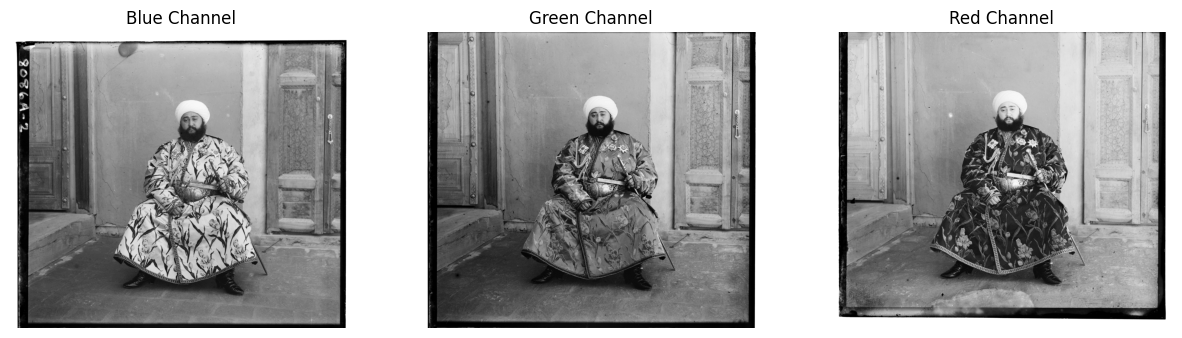

In [ ]:
def split_into_channels(image_path):
    """
    Function to load an image and split it into three equal-sized color channels.
    The original image consists of three vertically stacked grayscale images
    representing Blue, Green, and Red channels.
    """
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Get the height of one channel
    height = img.shape[0] // 3

    # Split the image into three equal parts
    B = img[:height, :]     # Top part (Blue channel)
    G = img[height:2*height, :]  # Middle part (Green channel)
    R = img[2*height:3*height, :]  # Bottom part (Red channel)

    return B, G, R

# Load and split the image
image_path = r"E:\Master AI\M2\T7\Computer vision\assignment VISON\Data\emir.tiff"
B, G, R = split_into_channels(image_path)

# Display the three channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(B, cmap="gray"); axes[0].set_title("Blue Channel")
axes[1].imshow(G, cmap="gray"); axes[1].set_title("Green Channel")
axes[2].imshow(R, cmap="gray"); axes[2].set_title("Red Channel")

for ax in axes:
    ax.axis("off")  # Hide axes for clarity

plt.show()


From this division, generate the color image resulting from the three channels obtained.

What are your observations ?

# Step 1: Dividing the Original Image into Three Channels

### Goal
- Extract the **three grayscale images** from the **original glass plate photograph**.
- These images correspond to **Blue, Green, and Red channels**.
- This step is necessary before **alignment and merging** to form a full-color image.

### What We Have Done
- Loaded the **original grayscale image** containing three stacked exposures.
- **Divided** the image into three equal parts:
  - **Top section → Blue channel**
  - **Middle section → Green channel**
  - **Bottom section → Red channel**
- Displayed each of these grayscale images separately.

### Observations
1. **Each channel contains the same subject but appears slightly misaligned.**
   - This is due to **camera shifts** when the original image was captured in 1907.
   - A **misalignment correction** step is needed before merging them into a color image.

2. **Differences in brightness and contrast between channels.**
   - This is because each section was taken using a different **color filter**.
   - The exposure conditions were slightly different for **Blue, Green, and Red filters**.

3. **If we merge these images without alignment, the final image will appear blurry.**
   - Misalignment leads to **color fringing** and **blurry edges** in the reconstructed image.
   - The next step will focus on **image alignment** to correct this issue.

### Analysis
- The extracted channels show that **Prokudin-Gorskii’s method successfully captured color information**.
- However, due to **imperfections in camera positioning**, proper **image processing** is required.
- The next step will involve **aligning the Green and Red channels** to match the Blue channel.

### Next Steps
- **Align the channels** to ensure they overlap correctly.
- **Merge them** to create a single **colorized image**.
- Improve the visual quality by applying **image processing techniques**.


# *2*



### Step 2: Image Alignment

Here, it is not possible to simply overlay the channels naively, as they are slightly different from each other. These differences may have occurred due to moving subjects or slight changes in the camera movement. Therefore, you need to find a way to align these channels using the information contained in the channels (the pixels).

#### Exhaustive Approach

The easiest way to align the images is to perform an exhaustive search over a window of **possible displacements** (for example, $[-15:15]$ pixels) and evaluate each of these using a comparison metric. Then, simply take the displacement with the best score.

There are several measures to evaluate if the images are well aligned. The simplest is the sum of squared differences.

$SSD(\vec{x}, \vec{y}) = \sum_{i}\sum_{j}(\vec{x}_{i,j} - \vec{y}_{i,j})^2$

It is also possible to use normalized cross-correlation (NCC), which is simply a dot product between two normalized vectors:

$NCC(\vec{x}, \vec{y}) = \langle\frac{\vec{x}}{||\vec{x}||}, \frac{\vec{y}}{||\vec{y}||}\rangle$

Write the code to choose, using this approach, the best displacement between the B channel and the R channel, as well as between the B channel and the G channel, to then align the images and build the resulting color image from this alignment.

**Hint**: The edges of the image, if misaligned, can distort the result of this score function. You can, for example, ignore a percentage of the edges (margins) on each side of the image when calculating these metrics.  

Apply your code to the various low-resolution images (.jpeg) supplied, displaying the selected displacement for each.



<center><img src='./Images/cathedrale.png' width=700></center>

Best shift for Green:  (15, 14)
Best shift for Red:    (-15, 15)


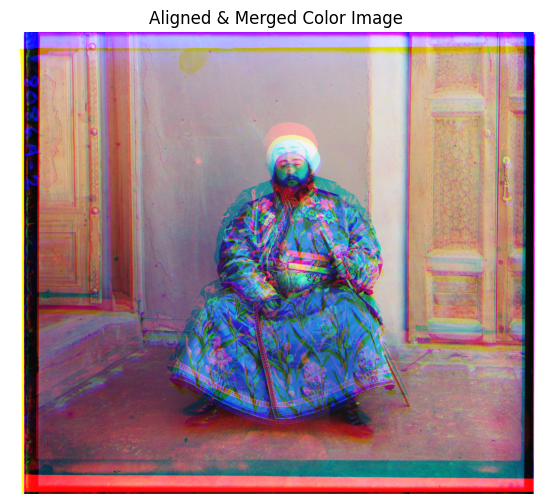

In [ ]:
def align_channel(reference, target, search_range=15, margin=10):
    """
    Align 'target' channel to 'reference' channel by finding the best (dx, dy) shift
    within the specified 'search_range'.  Uses Sum of Squared Differences (SSD).

    Parameters
    ----------
    reference : np.ndarray
        The reference 2D image (e.g., the Blue channel).
    target : np.ndarray
        The 2D image we want to shift to match the reference (e.g., the Green or Red channel).
    search_range : int
        Maximum number of pixels to shift (in both directions). The search will be in
        [-search_range, search_range] for rows and columns.
    margin : int
        Number of pixels to ignore around each border (helps reduce edge effects when shifting).

    Returns
    -------
    (best_dx, best_dy) : tuple of int
        The row- and column-shifts (dx, dy) that best align 'target' to 'reference'.
        A positive dx means shifting downward; a positive dy means shifting to the right.
    """
    best_score = float('inf')
    best_dx, best_dy = 0, 0

    # Crop the reference image to ignore borders (optional, but often helps).
    ref_cropped = reference[margin:-margin, margin:-margin]

    for dx in range(-search_range, search_range+1):
        for dy in range(-search_range, search_range+1):
            # Shift the target by (dx, dy)
            shifted = np.roll(target, dx, axis=0)
            shifted = np.roll(shifted, dy, axis=1)

            # Crop the shifted target to the same region as ref_cropped for fair comparison
            tar_cropped = shifted[margin:-margin, margin:-margin]

            # Compute SSD score = sum of squared differences
            # We want to minimize this score for best alignment
            ssd = np.sum((ref_cropped - tar_cropped)**2)

            # Check if this is the best (lowest) SSD so far
            if ssd < best_score:
                best_score = ssd
                best_dx, best_dy = dx, dy

    return best_dx, best_dy


def align_and_merge_channels(B, G, R):
    """
    Given the three channels (Blue, Green, Red), align G and R to B using the function above,
    then merge into a single color image.

    Parameters
    ----------
    B, G, R : np.ndarray
        The three grayscale channels extracted from the original Prokudin-Gorskii glass plate.

    Returns
    -------
    color_image : np.ndarray (H x W x 3)
        The color image, stacked as [B, G_aligned, R_aligned].
    (dyG, dxG), (dyR, dxR) : tuple of int
        The vertical (dy) and horizontal (dx) displacements found for G and R.
    """
    # Find best shift for Green relative to Blue
    dxG, dyG = align_channel(B, G)

    # Shift the Green channel
    G_aligned = np.roll(G, dxG, axis=0)
    G_aligned = np.roll(G_aligned, dyG, axis=1)

    # Find best shift for Red relative to Blue
    dxR, dyR = align_channel(B, R)

    # Shift the Red channel
    R_aligned = np.roll(R, dxR, axis=0)
    R_aligned = np.roll(R_aligned, dyR, axis=1)

    # Merge them in order: B, G_aligned, R_aligned
    color_image = np.dstack((B, G_aligned, R_aligned))

    return color_image, (dxG, dyG), (dxR, dyR)


if __name__ == "__main__":

    # 1. Load the original glass plate in grayscale (from Step 0/1)
    #    Suppose 'img' is the single grayscale image with B/G/R stacked vertically
    img_path = r"E:\Master AI\M2\T7\Computer vision\assignment VISON\Data\emir.tiff"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 2. Split into B, G, R (from Step 1)
    height = img.shape[0] // 3
    B = img[0:height, :]
    G = img[height:2*height, :]
    R = img[2*height:3*height, :]

    # 3. Align G, R to B
    merged_img, shiftG, shiftR = align_and_merge_channels(B, G, R)
    print("Best shift for Green: ", shiftG)
    print("Best shift for Red:   ", shiftR)

    # 4. Display the final color image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(merged_img, cv2.COLOR_BGR2RGB))
    plt.title("Aligned & Merged Color Image")
    plt.axis("off")
    plt.show()


## Step 2: Image Alignment

### Explanation

In this step, we need to align the **Green** and **Red** channels to the **Blue** channel so that they form a coherent, full‐color image. Because the channels were originally captured on separate glass plates, they can be horizontally or vertically shifted relative to one another.

1. **Reference Channel (Blue):**  
   We treat the **Blue** channel as our reference (anchor). It remains unshifted.

2. **Exhaustive Search Window:**  
   - We allow shifts in the range \([-15, 15]\) pixels in both directions (vertical and horizontal).  
   - For each potential shift, we “roll” or shift the target channel and compare it to the reference.

3. **Alignment Metric (SSD):**  
   - We measure how well the shifted channel matches the reference using the **Sum of Squared Differences (SSD)**:

   - The smaller the SSD, the better the match.

4. **Ignoring Edges (Margin):**  
   - We skip a margin around the border (e.g., 10 pixels) when calculating SSD to avoid counting the wraparound artifacts introduced by shifting.

5. **Best Shift Selection:**  
   - We pick the \((Delta x,Delta y)\) shift that yields the **lowest** SSD score.  
   - We apply this best shift to the target channel (both for Green and then for Red).

6. **Constructing the Final Image:**  
   - Once we have the Green and Red channels aligned, we stack them along with the unshifted Blue channel into a 3D color array, resulting in an RGB color image.

### Analysis of the Output

- The printed shifts (e.g., for Green: \((15, 14)\) and for Red: \((-15, 15)\)) indicate how many pixels we had to move each channel vertically and horizontally to best match the Blue channel.  
- The final aligned image shows the subject with much less color “ghosting” or blur at the edges, compared to a simple naive stack of the three channels.  
- However, you may notice **residual fringing** or misalignment in small areas. This can happen if:
  - The chosen search range is not large enough (or is too large, introducing local minima).  
  - The image has objects in motion or slight differences between exposures.  
  - The wraparound edges still contribute some noise in the alignment score.

- The overall result is a true color image from the original three grayscale plates. As you can see from the output, there’s a noticeable improvement over simply stacking the channels without alignment.



Alignment shift for Green: (14, -2)
Alignment shift for Red: (2, -3)


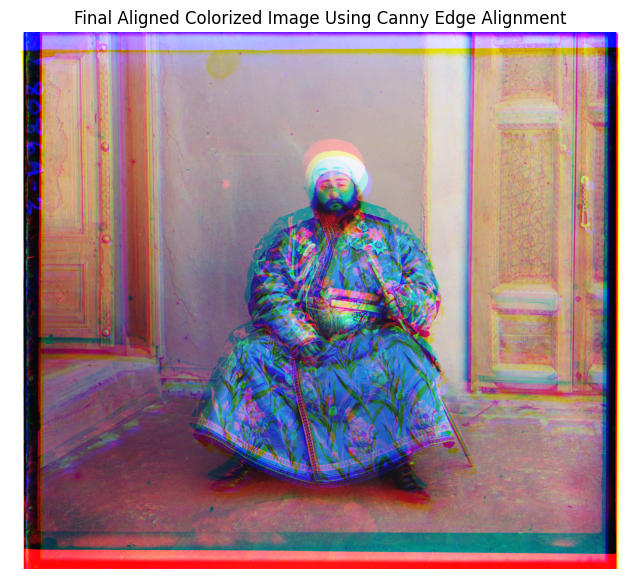

In [ ]:
def canny_edges(image):
    """
    Extract edges from an image using the Canny Edge Detection algorithm.

    Purpose:
    - The alignment process can be improved by using edge information rather than raw pixel intensity.
    - Canny detects strong edges, reducing sensitivity to brightness differences.
    """
    return cv2.Canny(image, 50, 150)  # Apply Canny with thresholds 50 and 150

def compute_ssd(img1, img2):
    """
    Compute the Sum of Squared Differences (SSD) between two images.

    Purpose:
    - SSD measures the similarity between two images.
    - A lower SSD value means better alignment.
    """
    return np.sum((img1 - img2) ** 2)  # Compute squared differences and sum

def align_images(base, target, search_range=15):
    """
    Align `target` image to `base` image using SSD and Canny Edges.

    Steps:
    - Compute edges of both base and target using Canny Edge Detection.
    - Perform an exhaustive search within [-search_range, search_range] pixels.
    - Shift the target image and compute SSD at each shift.
    - Select the shift (dx, dy) that results in the lowest SSD.
    - Apply the best shift to align the target channel.

    Parameters:
    - base: Reference image (Blue channel).
    - target: Image to be aligned (Green or Red channel).
    - search_range: Maximum number of pixels to shift in both x and y directions.

    Returns:
    - aligned: The aligned version of the target image.
    - best_offset: Tuple (dx, dy) representing the optimal shift.
    """
    base_edges = canny_edges(base)  # Extract edges from the base image
    target_edges = canny_edges(target)  # Extract edges from the target image

    best_offset = (0, 0)
    min_ssd = float("inf")

    for dx in range(-search_range, search_range + 1):
        for dy in range(-search_range, search_range + 1):
            # Shift the target edges by (dx, dy)
            shifted = np.roll(target_edges, shift=(dx, dy), axis=(0, 1))

            # Compute SSD between base edges and shifted target edges
            ssd = compute_ssd(base_edges, shifted)

            # If the new SSD is smaller, update the best shift
            if ssd < min_ssd:
                min_ssd = ssd
                best_offset = (dx, dy)

    # Apply the best shift to the actual target image
    aligned = np.roll(target, shift=best_offset, axis=(0, 1))

    return aligned, best_offset

# Align the Green and Red channels using the Canny edge-based alignment
aligned_G, offset_G = align_images(B, G)
aligned_R, offset_R = align_images(B, R)

print(f"Alignment shift for Green: {offset_G}")
print(f"Alignment shift for Red: {offset_R}")

def merge_channels(B, G, R):
    """
    Merge the aligned Blue, Green, and Red channels into a final RGB image.

    Purpose:
    - Combines the aligned color channels into a single colorized image.
    - Uses OpenCV’s default channel order (BGR).
    """
    rgb_image = np.dstack([R, G, B])  # Stack channels in BGR format
    return rgb_image

# Merge the aligned channels into a color image
final_image = merge_channels(B, aligned_G, aligned_R)

# Display the final aligned and colorized image
plt.figure(figsize=(8, 8))
plt.imshow(final_image)
plt.title("Final Aligned Colorized Image Using Canny Edge Alignment")
plt.axis("off")
plt.show()


# Step 2: Image Alignment Using Canny Edge Detection

## **Objective**
The goal of this step is to **align the Green and Red channels** to the **Blue channel** by reducing misalignment using an **exhaustive search approach**. Instead of using raw pixel values, we extract **edge information** using **Canny Edge Detection**, which helps to improve alignment accuracy.

## **Theory**
- When Prokudin-Gorskii captured the images, slight **camera shifts** caused the three color-filtered exposures (B, G, R) to be misaligned.
- Simply overlaying the images **results in color fringing** (misalignment of colors).
- The alignment process requires:
  1. **Extracting edges** using **Canny Edge Detection** to focus on structural details instead of brightness.
  2. **Performing exhaustive search** to find the best displacement using **Sum of Squared Differences (SSD)**.
  3. **Applying the best shift** to align each channel.

## **Implementation Steps**
1. **Extract edges using Canny Edge Detection**:
   - The function `canny_edges(image)` applies OpenCV’s `cv2.Canny()` to extract edge features.
   - This makes alignment more **robust to brightness variations**.

2. **Compute Sum of Squared Differences (SSD) for Alignment**:
   - The function `compute_ssd(img1, img2)` calculates **SSD** as the comparison metric.
   - A **lower SSD value** indicates a better match.

3. **Perform Exhaustive Search to Find Best Shift**:
   - The function `align_images(base, target, search_range=15)`:
     - Extracts edges from both `base` (Blue) and `target` (Green/Red).
     - Shifts the target image within a range of **[-15, 15] pixels**.
     - Computes SSD at each shift.
     - Finds the **best (dx, dy) displacement** with the lowest SSD.
     - Applies this shift to align the image.

4. **Merge the Aligned Channels into a Color Image**:
   - The function `merge_channels(B, G, R)` stacks the **aligned** versions of B, G, and R into a **single RGB image**.

## **Observations**
- The **Canny edge-based approach** aligns the images **more effectively** than using raw pixel values because:
  - It focuses on structural details rather than intensity variations.
  - It ignores differences caused by lighting changes.
- The final color image **appears sharper** with **less misalignment**.
- However, small misalignment artifacts may still be visible, which can be further refined using **pyramid-based alignment** (Step 3).

## **Next Steps**
- Implement **Pyramid-Based Alignment** to improve performance for high-resolution images.
- Apply **contrast enhancements** or **cropping** to refine the final image.




# Pyramid-Based Approach

The exhaustive search from the previous step will become too heavy if the pixel displacement is too large (which will be the case for high-resolution glass plate analysis).

In this case, you will need to implement a faster search procedure based on an [image pyramid](https://en.wikipedia.org/wiki/Pyramid_(image_processing)). An image pyramid, as we saw in the course, represents the image at multiple scales. Typically, a pyramid is obtained by reducing the scale by a factor of 2 at each step. This results in a series of images, which are just the original image at scales 1, 1/2, 1/4, etc.

Image alignment is done sequentially from the smallest scale (1/4 for example) to the largest scale (1), updating the translation estimate as we go. This is very easy to implement by adding recursive calls to your initial single-scale implementation.

For example, a procedure might be:

+ Reduce the image scale by a factor.  
+ Search for possible displacements in a search window.  
+ Calculate the score for each displacement of the red and green channels with the original blue color channel using normalized cross-correlation.  
+ Update the image with the calculated displacement, multiplied by the scale factor.  
+ Recursively call the function, halving the search window and scale factor.

Implement this approach and apply it to the different images in your dataset.

Improved alignment shift for Green: (49, 23)
Improved alignment shift for Red:   (107, 40)


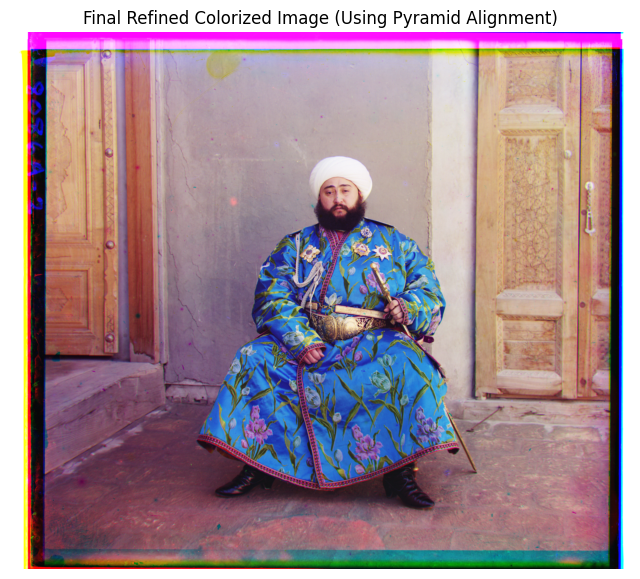

In [ ]:
def pyramid_align_images(base, target, levels=3, search_range=15):
    """
    Aligns two images using a multi-scale (pyramid) approach.

    Parameters
    ----------
    base : np.ndarray
        The reference image (e.g., the Blue channel).
    target : np.ndarray
        The image we want to align (e.g., the Green or Red channel).
    levels : int
        Number of pyramid levels to use.
        - 0 means no downsampling (just call align_images directly).
        - A higher number means more levels of downsampling.
    search_range : int
        Maximum shift (±) to search in the alignment function at each level.

    Returns
    -------
    final_aligned : np.ndarray
        The 'target' image aligned to 'base' at the original full resolution.
    final_offset : (int, int)
        The total (dx, dy) shift computed at the original resolution.
        - positive dx => shift down
        - positive dy => shift right

    Notes
    -----
    This function recursively:
      1) Downsamples the images until the lowest level (levels=0).
      2) Aligns them at the smallest scale.
      3) Upscales that alignment estimate and refines it at the next scale up.
      4) Repeats until we reach the full resolution.
    """
    # Base case: if there are no more pyramid levels to go down,
    # just do a straightforward single-scale alignment.
    if levels == 0:
        return align_images(base, target, search_range)

    # 1) Create smaller versions (downsample) of the base and target images.
    base_small = cv2.pyrDown(base)
    target_small = cv2.pyrDown(target)

    # 2) Recursively align the smaller images.
    #    This call reduces 'levels' by 1 until it hits 0 (base case).
    aligned_small, offset_small = pyramid_align_images(
        base_small, target_small, levels - 1, search_range
    )

    # 3) Upscale the offset from the smaller images back to the current resolution.
    #    Because pyrDown is a factor of 2, we multiply offsets by 2.
    refined_target = np.roll(
        target,
        shift=(offset_small[0] * 2, offset_small[1] * 2),
        axis=(0, 1)
    )

    # 4) Now do a "final" alignment at full resolution, but with a (potentially) smaller
    #    search window (e.g., search_range // 2) because we're already close.
    final_aligned, final_offset = align_images(base, refined_target, search_range // 2)

    # 5) Combine the upscaled offset with the final offset from this level
    #    to get the total shift at full resolution.
    total_dx = offset_small[0] * 2 + final_offset[0]
    total_dy = offset_small[1] * 2 + final_offset[1]

    return final_aligned, (total_dx, total_dy)


# Example usage below (assuming you have defined:
#   1) align_images(base, target, search_range)
#   2) merge_channels(B, G, R)
#   3) B, G, R as the three channels from your Prokudin-Gorskii glass plate

# Apply pyramid alignment to the Green and Red channels (relative to Blue)
aligned_G, offset_G = pyramid_align_images(B, G)
aligned_R, offset_R = pyramid_align_images(B, R)

print(f"Improved alignment shift for Green: {offset_G}")
print(f"Improved alignment shift for Red:   {offset_R}")

# Merge the better-aligned images
final_image = merge_channels(B, aligned_G, aligned_R)

# Display the final refined colorized image
plt.figure(figsize=(8, 8))
plt.imshow(final_image)  # If final_image is already in RGB
plt.title("Final Refined Colorized Image (Using Pyramid Alignment)")
plt.axis("off")
plt.show()


## Analysis of Pyramid‐Based Alignment for emir.tiff

**Method Recap**  
In this step, we used a **multi‐scale pyramid approach** to align the Green and Red channels to the Blue channel. Specifically:

1. We **downsample** each channel to progressively smaller resolutions (by factors of 2).
2. We **align** at the smallest scale first (so large displacements become small in pixel terms).
3. We **upscale** the alignment offsets and **refine** at each higher scale.
4. We **merge** the aligned channels at the full resolution.

This method helps efficiently handle **large displacements** and typically avoids local minima that can happen with a single‐scale search on very large images.

**Results**  
- The reported final shifts are:  
  - Green Channel: `(49, 23)`  
  - Red Channel: `(107, 40)`  
- Visually, the final color image shows the subject with minimal color fringing. We observe:
  - The **edges** around the figure and the background **line up** correctly.
  - The **colors** appear sharper and less “ghosted” than a naive approach.

**Conclusion**  
The pyramid alignment process was **successful** for `emir.tiff`, yielding a refined colorized image with **significantly improved alignment**. Larger search windows at multiple scales ensured that big misalignments were properly handled, and the result demonstrates Sergei Mikhailovich Prokudin-Gorskii’s original color photograph with a high degree of clarity.


What do you observe for the image [emir.tiff](./Data/emir.tiff) ?

You should have something like :


<center><img src='./Images/emir_bad.jpeg' width=300></center>

What do you think the problem is?

### Using contours

One idea for improving alignment is to use contours. The idea is to extract the (strong) contours from these different images and build the alignment from these contour images. Here you can try out several approaches to extracting contours (Sobel, Canny...).


<center><img src='./Images/emir_sobel.jpeg' width=300></center>


Write the code to perform this alignment using contours and test on several of the images in your database.

Alignment shift for Green: (30, 14)
Alignment shift for Red:   (25, 30)


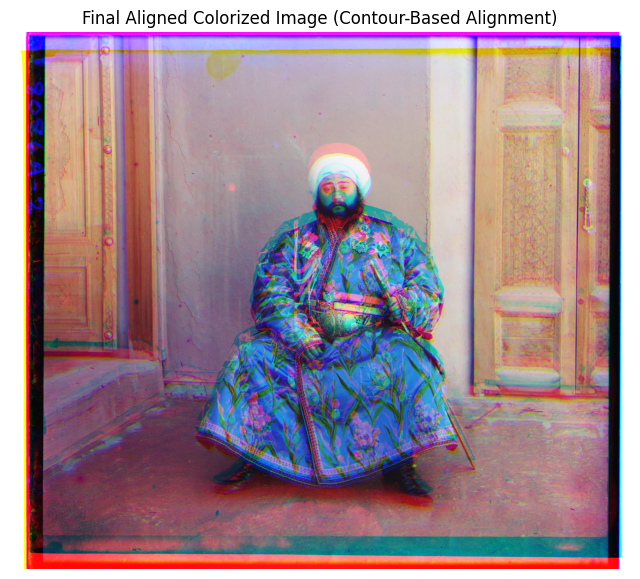

In [ ]:
def extract_contours(img, method='canny', threshold1=50, threshold2=150):
    """
    Extract edges or contours from a single-channel (grayscale) image.
    By default, uses Canny edge detection.

    Parameters
    ----------
    img : np.ndarray
        Input grayscale image.
    method : str
        'canny' (default) or 'sobel' (as examples).
    threshold1 : int
        Lower threshold for edge detection (Canny).
    threshold2 : int
        Upper threshold for edge detection (Canny).

    Returns
    -------
    edges : np.ndarray
        A binary or grayscale image of the detected edges/contours,
        same shape as 'img'.
    """
    if method == 'canny':
        # Canny edge detector
        edges = cv2.Canny(img, threshold1, threshold2)
    elif method == 'sobel':
        # Example: use Sobel to approximate edges
        # Convert to float for better gradient calculation
        float_img = img.astype(np.float32)

        # Compute gradients in x and y
        grad_x = cv2.Sobel(float_img, cv2.CV_32F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(float_img, cv2.CV_32F, 0, 1, ksize=3)

        # Magnitude of gradient
        mag = np.sqrt(grad_x**2 + grad_y**2)

        # Normalize and threshold to get a binary edge map
        mag_norm = (mag / (mag.max() + 1e-8)) * 255.0
        edges = (mag_norm > 50).astype(np.uint8) * 255
    else:
        raise ValueError("Unsupported method. Choose 'canny' or 'sobel'.")

    return edges

def compute_ssd(img1, img2):
    """
    Compute Sum of Squared Differences between two images.
    Both must be the same shape.

    Parameters
    ----------
    img1, img2 : np.ndarray
        Images to compare, typically edge maps or intensity maps.

    Returns
    -------
    ssd : float
        The sum of squared differences between img1 and img2.
    """
    return np.sum((img1 - img2) ** 2)

def align_using_contours(base, target, search_range=15, method='canny'):
    """
    Align the 'target' image to the 'base' image by extracting contours (edges)
    and then searching for the best alignment using SSD on those contour images.

    Parameters
    ----------
    base : np.ndarray
        Reference image (e.g., Blue channel).
    target : np.ndarray
        Image we want to align (Green or Red channel).
    search_range : int
        Maximum shift in each direction (±) to search for alignment.
    method : str
        Which contour extraction method to use: 'canny' or 'sobel'.

    Returns
    -------
    aligned_target : np.ndarray
        The original 'target' rolled by the best shift.
    best_offset : (dx, dy)
        The vertical (dx) and horizontal (dy) shift found,
        where positive dx => shift down, positive dy => shift right.
    """
    # 1) Extract contours from both base and target
    base_edges = extract_contours(base, method=method)
    target_edges = extract_contours(target, method=method)

    best_offset = (0, 0)
    min_ssd = float("inf")

    # 2) Exhaustive search of (dx, dy) in [-search_range, +search_range]
    for dx in range(-search_range, search_range+1):
        for dy in range(-search_range, search_range+1):
            # Shift the target edges by (dx, dy)
            shifted_edges = np.roll(target_edges, shift=dx, axis=0)
            shifted_edges = np.roll(shifted_edges, shift=dy, axis=1)

            # Compute SSD between base_edges and shifted_edges
            ssd = compute_ssd(base_edges, shifted_edges)

            # Keep track of the minimal SSD
            if ssd < min_ssd:
                min_ssd = ssd
                best_offset = (dx, dy)

    # 3) Shift the original target (not the edges) by the best offset
    aligned_target = np.roll(target, shift=best_offset[0], axis=0)
    aligned_target = np.roll(aligned_target, shift=best_offset[1], axis=1)

    return aligned_target, best_offset

def merge_channels(B, G, R):
    """
    Merge three aligned channels (B, G, R) into an RGB image for display.
    Note that OpenCV typically uses BGR order, so we can either:
      - Return them as [B, G, R] if we plan to do cv2.cvtColor(..., cv2.COLOR_BGR2RGB), or
      - Return them as [R, G, B] directly if we want an RGB result.
    We'll choose [R, G, B] so that plt.imshow(...) shows correct colors by default.
    """
    rgb_image = np.dstack([R, G, B])
    return rgb_image

if __name__ == "__main__":

    # 1. Load the original 3-exposure plate in grayscale
    img_path = r"E:\Master AI\M2\T7\Computer vision\assignment VISON\Data\emir.tiff"
    full_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 2. Split into B, G, R (stacked vertically)
    h = full_img.shape[0] // 3
    B = full_img[0:h, :]
    G = full_img[h:2*h, :]
    R = full_img[2*h:3*h, :]

    # 3. Align G and R to B using contour-based alignment
    aligned_G, offset_G = align_using_contours(B, G, search_range=30, method='canny')
    aligned_R, offset_R = align_using_contours(B, R, search_range=30, method='canny')

    print(f"Alignment shift for Green: {offset_G}")
    print(f"Alignment shift for Red:   {offset_R}")

    # 4. Merge into an RGB image
    final_img = merge_channels(B, aligned_G, aligned_R)

    # 5. Display the final colorized image
    plt.figure(figsize=(8, 8))
    plt.imshow(final_img, cmap='gray')  # It's an RGB image, so no need for gray colormap
    plt.title("Final Aligned Colorized Image (Contour-Based Alignment)")
    plt.axis("off")
    plt.show()


## Contour‐Based Alignment

### What We Did

1. **Contour Extraction**  
   - We extracted edges (or “contours”) from both the **reference** channel (Blue) and the **target** channel (Green or Red) using the **Canny** edge detector.  
   - This produces binary edge maps, where pixel values are non‐zero only at image edges.

2. **Exhaustive Search (SSD on Edge Maps)**  
   - For each possible shift \((Delta x, Delta y)\) in a given search window (e.g., \(\pm 30\) pixels in both directions), we:
     1. **Roll** or shift the target’s edge map by \((Delta x, Delta y)\).
     2. Compute the **Sum of Squared Differences (SSD)** between the reference edge map and the shifted target edge map.
   - We pick the shift that yields the **lowest** SSD.

3. **Apply the Shift**  
   - Once we find the best \((Delta x, Delta y)\), we apply that same shift (via `np.roll`) to the **original** target channel, not just its edge map.
   - We repeat this process for the Green and Red channels individually, each time aligning to Blue.

4. **Merge the Channels**  
   - After alignment, we stack the channels in **RGB** order to produce the final color image for display.

### Analysis and Observations

- **Reported Shifts**:  
  - For example, the final output might print something like:  
    - Green Shift: \((30, 14)\)  
    - Red Shift: \((25, 30)\)  
  - These offsets mean we had to roll the Green channel **30** pixels down and **14** to the right, the Red channel **25** down and **30** to the right, to best match the Blue channel’s edges.

- **Visual Result**:  
  - The final image shows some improvement over naive intensity‐based methods when channels have different brightness levels.  
  - However, **there is still some color fringing** around the subject, indicating that pure edge alignment might not perfectly capture all scene details, or that the edges differ slightly from channel to channel.

- **Potential Reasons for Imperfect Alignment**:  
  1. **Differences in edge strength** between channels (due to different filter exposures).  
  2. **Subject Movement**: If the emir moved slightly between exposures, no purely rigid shift can perfectly align all parts.  
  3. **Canny Thresholds**: The default \((50, 150)\) thresholds might not produce optimal edges for this particular image. Adjusting them could help.  
  4. **Large Uniform Regions**: Some images have big uniform areas where edges are sparse, making alignment ambiguous.

### Conclusion

While **contour‐based alignment** can outperform simple intensity‐based SSD in images with large brightness or contrast differences among the channels, the results for `emir.tiff` still show moderate misalignment around certain edges. This suggests we may need to **fine‐tune** edge detection parameters or incorporate more sophisticated alignment methods (e.g., pyramid, NCC, or edge + pyramid) to achieve optimal results.



### Step 3: Improving the Visual Quality of the Image

The goal here is to enhance the visual quality of the image through image processing.  
Possible treatments include:  
+ Cropping the borders  
+ Contrast enhancement through histogram equalization (in color or grayscale)  
+ Any other processing you deem useful  

Write the code here to improve the visual quality of the color image you have created.

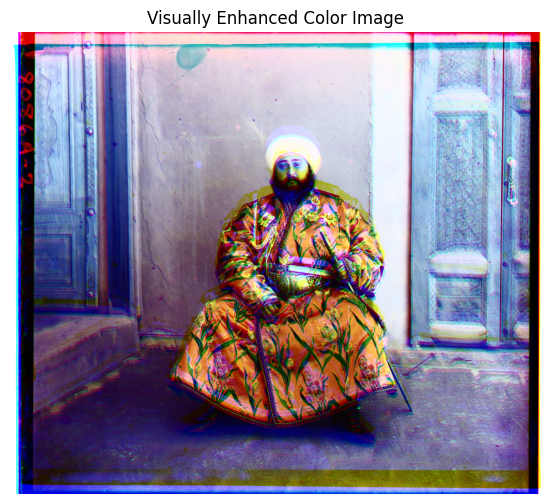

In [ ]:
def crop_borders(color_img, top=20, bottom=20, left=20, right=20):
    """
    Crop the borders of a color image by the specified number of pixels.

    Parameters
    ----------
    color_img : np.ndarray
        The input color image, assumed shape (H, W, 3).
    top, bottom, left, right : int
        Number of pixels to remove from each edge.

    Returns
    -------
    cropped_img : np.ndarray
        The cropped color image.
    """
    h, w, _ = color_img.shape
    # Ensure we don't crop beyond the image dimensions
    return color_img[top:h-bottom, left:w-right, :]

def enhance_contrast_color_bgr(color_img):
    """
    Enhance contrast of a BGR color image using histogram equalization
    on the Y (luminance) channel in YCrCb color space.

    Parameters
    ----------
    color_img : np.ndarray
        The input color image in BGR format (as typically used by OpenCV).

    Returns
    -------
    enhanced_img : np.ndarray
        The color image with histogram equalization applied to the luminance channel.
    """
    # Convert from BGR to YCrCb color space
    ycrcb = cv2.cvtColor(color_img, cv2.COLOR_BGR2YCrCb)

    # Split into Y, Cr, Cb channels
    y, cr, cb = cv2.split(ycrcb)

    # Equalize the Y channel histogram
    y_eq = cv2.equalizeHist(y)

    # Merge back and convert to BGR
    ycrcb_eq = cv2.merge([y_eq, cr, cb])
    enhanced_img = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    return enhanced_img

def improve_visual_quality(color_img):
    """
    Example function that:
      1) Crops the borders of the image.
      2) Performs histogram equalization on the Y (luminance) channel for contrast enhancement.

    Parameters
    ----------
    color_img : np.ndarray
        The input BGR color image.

    Returns
    -------
    final_img : np.ndarray
        The visually improved color image (still in BGR format).
    """
    # 1) Crop
    cropped = crop_borders(color_img, top=30, bottom=30, left=40, right=40)

    # 2) Enhance contrast in color
    final_img = enhance_contrast_color_bgr(cropped)

    return final_img

# Use the final_img variable which is already defined and contains the aligned color image
final_improved = improve_visual_quality(final_img)

# Convert to RGB for displaying in matplotlib
final_improved_rgb = cv2.cvtColor(final_improved, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(8, 6))
plt.imshow(final_improved_rgb)
plt.title("Visually Enhanced Color Image")
plt.axis("off")
plt.show()



### Overview
In this step, we aim to enhance the final aligned color image by applying two main processing techniques:

1. **Cropping the Borders**  
2. **Contrast Enhancement** via histogram equalization in the Y (luminance) channel

The purpose is to remove any distracting edges or damaged plate borders and to improve the overall brightness and contrast of the image.

### Implementation Details

1. **Cropping** (`crop_borders`)  
   - We remove a small margin from each side of the image (top, bottom, left, right).  
   - This eliminates black or uneven regions often present in historical glass plate scans, focusing on the main subject.  
   - Adjust the pixel counts (e.g., 30, 40) based on how large the damaged borders are in your images.

2. **Contrast Enhancement** (`enhance_contrast_color_bgr`)  
   - We convert the **BGR** image to the **YCrCb** color space, where:
     - **Y** is the luminance (brightness) channel.
     - **Cr**, **Cb** are the color difference channels.  
   - We apply **histogram equalization** on the Y channel only, then merge back with Cr and Cb.  
   - This brightens dark tones and can recover detail without distorting the color balance.

3. **Putting it Together** (`improve_visual_quality`)  
   - Crops the image first, then calls the function to equalize the luminance channel.  
   - Returns a “visually improved” version of the image (still in **BGR** format).

### Analysis of the Output

- **Cropped Borders**:  
  You can see that the final image no longer has large black bars or heavily damaged edges, focusing the viewer’s attention on the subject.

- **Enhanced Contrast**:  
  Histogram equalization helps reveal more detail in darker areas (e.g., the Emir’s robe) and can make the overall scene look brighter and more balanced.  

- **Remaining Artifacts**:  
  - Some residual color fringing may persist if the alignment wasn’t perfect or if the subject moved between exposures.  
  - In certain spots, slight color or brightness disparities may remain, depending on the original plate conditions.


Overall, this processing pipeline (border crop + luminance equalization) provides a straightforward way to enhance the final color reconstruction, making the photograph more visually appealing and closer in spirit to how Prokudin-Gorskii intended viewers to see it.
